# Anàlisi de les dades del Titanic

[https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

## 1. Preparació de l'entorn

In [1]:
# Importació de mòduls

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import re as re

%matplotlib inline

In [4]:
# Càrrega de dades

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dades = [train, test]

In [5]:
# Informació dels atributs

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Descripció estadística dels atributs numèrics

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Exploració i transformació de les dades

### PassengerId

In [7]:
# Eliminem l'atribut PassengerId

train.drop(['PassengerId'], axis=1, inplace=True)

### Survived

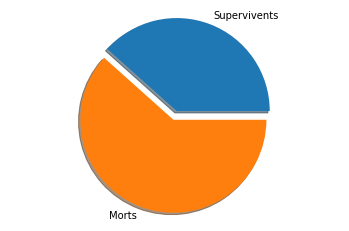

In [8]:
# Percentatge de supervivents

survived = [train.loc[train.Survived==1, 'Survived'].count(),train.loc[train.Survived==0, 'Survived'].count()]
fig1, ax1 = plt.subplots()
plt.pie(survived, shadow = True, labels = ["Supervivents","Morts"], explode = (0.1,0))
ax1.axis('equal')
plt.show()

### Pclass

In [9]:
# Mitjana de supervivents per classe

train[['Pclass', 'Survived']].groupby(['Pclass']).mean().T

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


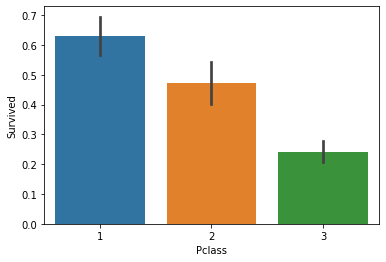

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)

### Sex

In [11]:
# Supervivents per sexe

train[["Sex", "Survived"]].groupby(['Sex']).mean().T

Sex,female,male
Survived,0.742038,0.188908


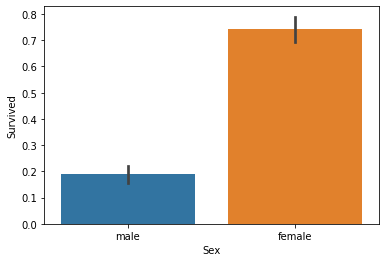

In [12]:
sns.barplot(x="Sex",y="Survived", data = train)

In [13]:
# Transformem l'atribut a binari

for df in dades:
    df['Sex'] = (df['Sex'] == 'male')

### SibSp

In [14]:
# Supervivients segons el nombre de germans/marit/muller

train[["SibSp", "Survived"]].groupby(['SibSp']).mean().T

SibSp,0,1,2,3,4,5,8
Survived,0.345395,0.535885,0.464286,0.25,0.166667,0.0,0.0


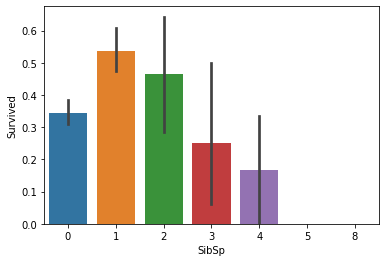

In [15]:
sns.barplot(x="SibSp",y="Survived",data=train)

In [16]:
# Unim els valors superiors a 2

for df in dades:
    df.loc[df.SibSp>2,'SibSp'] = 3

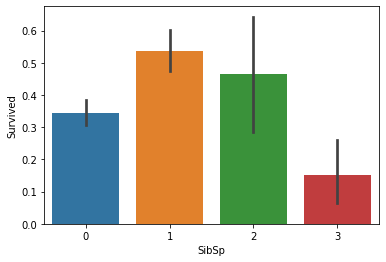

In [17]:
sns.barplot(x="SibSp",y="Survived",data=train)

### Parch

In [18]:
# Supervivents segons el nombre de pares/fills

train[["Parch", "Survived"]].groupby(['Parch']).mean().T

Parch,0,1,2,3,4,5,6
Survived,0.343658,0.550847,0.5,0.6,0.0,0.2,0.0


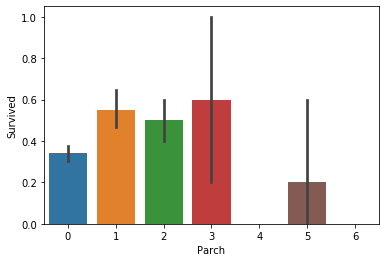

In [19]:
sns.barplot(x="Parch", y="Survived", data = train)

In [20]:
# Unim els valors superiors a 3

for df in dades:
    df.loc[df.Parch>3,'Parch'] = 4

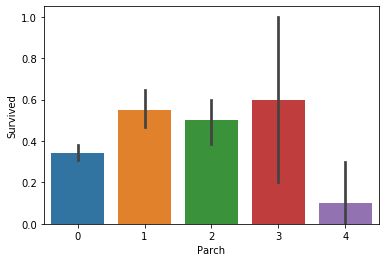

In [21]:
sns.barplot(x="Parch",y="Survived",data=train)

### FamilySize

In [22]:
# Generem un atribut que indica la mida de la família

for df in dades:
    df['FamilySize'] = (df['SibSp'] + df['Parch'] + 1)

train[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().T

FamilySize,1,2,3,4,5,6
Survived,0.303538,0.552795,0.578431,0.724138,0.115385,0.194444


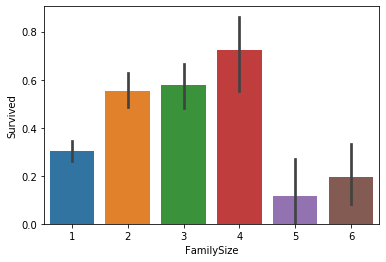

In [23]:
sns.barplot(x="FamilySize", y="Survived", data = train)

In [24]:
# Generem tres categories

for df in dades:
    df.loc[(df.FamilySize > 1) & (df.FamilySize < 5), "FamilySize"] = 2
    df.loc[df.FamilySize > 4, "FamilySize"] = 3

FamilySize,1,2,3
Survived,0.303538,0.578767,0.16129


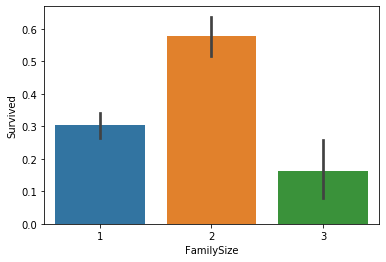

In [25]:
sns.barplot(x="FamilySize", y="Survived", data = train)
train[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().T

### Ticket

In [26]:
# Eliminem l'atribut Ticket

for df in dades:
    df.drop(['Ticket'], axis=1, inplace=True)

### Embarked

In [27]:
# Supervivents segons el lloc d'embarcament

train[['Embarked', 'Survived']].groupby(['Embarked']).count().T

Embarked,C,Q,S
Survived,168,77,644


In [28]:
# Correcció valors nuls

train['Embarked'] = train['Embarked'].fillna('S')
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().T

Embarked,C,Q,S
Survived,0.553571,0.38961,0.339009


In [29]:
# Generem un atribut binari segons si han embarcat a Cherbourg

train['Embarked_C'] = (train.Embarked == 'C')
test['Embarked_C'] = (test.Embarked == 'C')

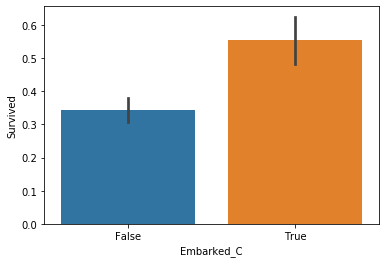

In [30]:
sns.barplot(x="Embarked_C", y="Survived", data=train)

In [31]:
for df in dades:
    df.drop(['Embarked'], axis=1, inplace=True)

### Fare

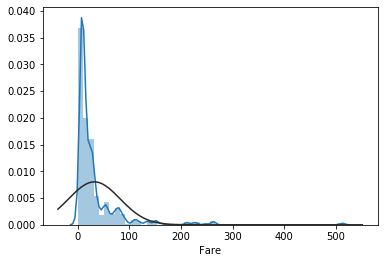

In [32]:
# Distribució dels valors de l'atribut Fare

sns.distplot(train['Fare'], fit = norm)

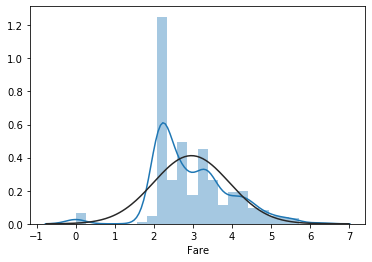

In [33]:
# Transformació logarítmica de les dades

for df in dades:
    df['Fare'].fillna(df['Fare'].mean(), inplace = True)
    df['Fare'] = np.log1p(df['Fare'])

sns.distplot(train['Fare'], fit = norm)

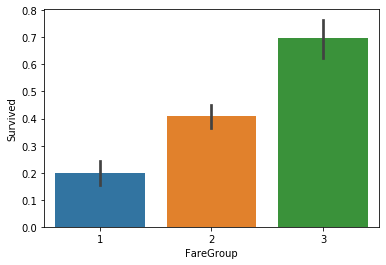

In [34]:
# Creació de categories

for df in dades:
    df['FareGroup'] = pd.qcut(df['Fare'], 6, labels=range(6))
    df['FareGroup'] = df['FareGroup'].astype('int')
    df.loc[df.FareGroup<2,'FareGroup'] = 1
    df.loc[(df.FareGroup>1) & (df.FareGroup<5),'FareGroup'] = 2
    df.loc[df.FareGroup>4,'FareGroup'] = 3

sns.barplot(x="FareGroup", y="Survived", data=train)

In [35]:
for df in dades:
    df.drop(['Fare'], axis=1, inplace=True)

### Cabin

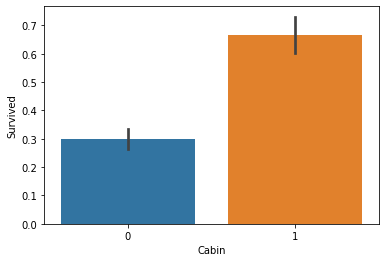

In [36]:
# Supervivents segons si tenen cabina

for df in dades:
    df.loc[df.Cabin.notnull(),'Cabin'] = 1
    df.loc[df.Cabin.isnull(),'Cabin'] = 0

sns.barplot(x="Cabin", y="Survived", data=train)

### Age

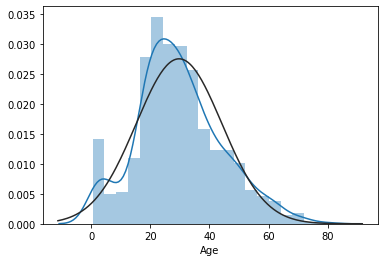

In [37]:
# Distribució d'edats

sns.distplot(train.loc[train.Age.notnull(),'Age'], fit = norm)

In [38]:
# Categorització en grups d'edat

for df in dades:
    df["Age"] = df["Age"].fillna(-0.5)
    bins = [-1,0, 5, 10, 15, 30, 60, np.inf]
    df['AgeGroup'] = pd.cut(df["Age"], bins, labels = range(7))
    df.drop(['Age'], axis=1, inplace=True)

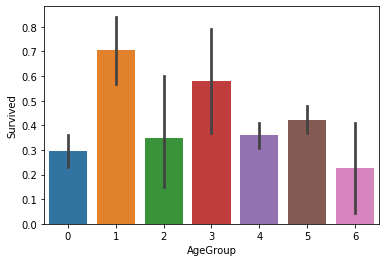

In [39]:
sns.barplot(x="AgeGroup", y="Survived", data=train)

### Name

In [40]:
# Supervivents segons el títol que figura al nom

for df in dades:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    df.drop(['Name'], axis=1, inplace=True)

rareTitles = ['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','Dona']
for df in dades:
    df.loc[df['Title'].isin(rareTitles), 'Title'] = 'Rare'

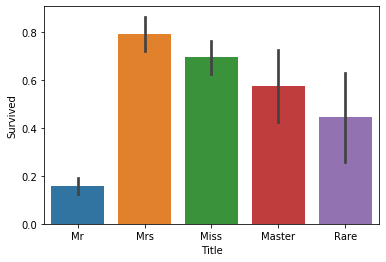

In [41]:
sns.barplot(x="Title", y="Survived", data=train)
plt.show()

## Correlació

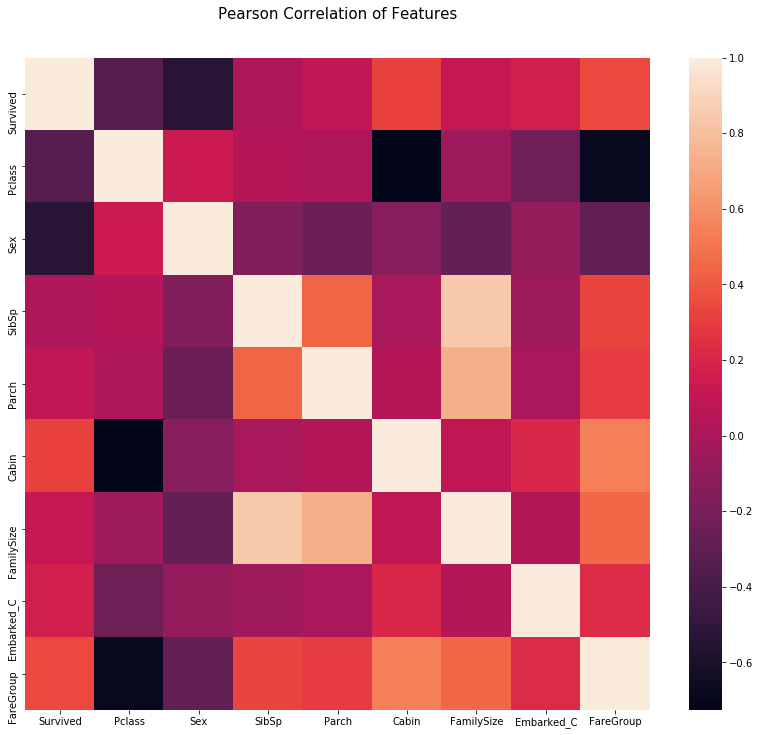

In [42]:
# Anàlisi de correlacions

correlation_matrix = train.corr()
correlation_matrix

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

In [43]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,FamilySize,Embarked_C,FareGroup
Survived,1.000000,-0.338481,-0.543351,0.012638,0.091304,0.316912,0.108631,0.168240,0.346147
Pclass,-0.338481,1.000000,0.131900,0.041981,0.010955,-0.725541,-0.043973,-0.243292,-0.687322
Sex,-0.543351,0.131900,1.000000,-0.158024,-0.248358,-0.140391,-0.280570,-0.082853,-0.288030
SibSp,0.012638,0.041981,-0.158024,1.000000,0.435937,-0.007697,0.839133,-0.040024,0.326493
Parch,0.091304,0.010955,-0.248358,0.435937,1.000000,0.044670,0.730982,-0.006724,0.295737
Cabin,0.316912,-0.725541,-0.140391,-0.007697,0.044670,1.000000,0.088993,0.208528,0.536885
FamilySize,0.108631,-0.043973,-0.280570,0.839133,0.730982,0.088993,1.000000,0.030226,0.447392
Embarked_C,0.168240,-0.243292,-0.082853,-0.040024,-0.006724,0.208528,0.030226,1.000000,0.227446
FareGroup,0.346147,-0.687322,-0.288030,0.326493,0.295737,0.536885,0.447392,0.227446,1.000000


## Binarització

In [44]:
# Creació d'atributs binaris

columnes = ['Title']
for col in columnes:
    train = pd.get_dummies(train, columns=[col], dummy_na=False)
for col in columnes:
    test = pd.get_dummies(test, columns=[col], dummy_na=False)

In [45]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,FamilySize,Embarked_C,FareGroup,AgeGroup,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,True,1,0,0,2,False,1,4,0,0,1,0,0
1,1,1,False,1,0,1,2,True,3,5,0,0,0,1,0
2,1,3,False,0,0,0,1,False,1,4,0,1,0,0,0
3,1,1,False,1,0,1,2,False,3,5,0,0,0,1,0
4,0,3,True,0,0,0,1,False,1,5,0,0,1,0,0


## Entrenament i test

In [46]:
# Preparació dels conjunts d'entrenament i test

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = train.drop('Survived', 1)
y = train.Survived

test_id = test.PassengerId
test = test.drop('PassengerId',1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

prediccio = pd.DataFrame({'Real':y_test})

## Models

### Regressió logística

In [47]:
# Optimització de paràmetres de regressió logística

parameters = {'C':[0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
modelLR = LogisticRegression(solver='liblinear')
search = GridSearchCV(modelLR, parameters, cv=4, return_train_score=False)
search.fit(X_train, y_train)
resultat = pd.DataFrame(search.cv_results_)
resultat.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
8,0.064891,0.011418,0.001969,0.000276,100,l1,"{'C': 100, 'penalty': 'l1'}",0.788462,0.826923,0.839744,0.864516,0.829856,0.027470,1
7,0.005116,0.000295,0.001607,0.000140,10,l2,"{'C': 10, 'penalty': 'l2'}",0.788462,0.826923,0.839744,0.858065,0.828250,0.025516,2
9,0.006107,0.001996,0.001712,0.000354,100,l2,"{'C': 100, 'penalty': 'l2'}",0.788462,0.826923,0.839744,0.858065,0.828250,0.025516,2
4,0.015934,0.006124,0.002334,0.000746,1,l1,"{'C': 1, 'penalty': 'l1'}",0.794872,0.820513,0.839744,0.851613,0.826645,0.021454,4
6,0.018593,0.006645,0.002307,0.000604,10,l1,"{'C': 10, 'penalty': 'l1'}",0.788462,0.820513,0.839744,0.858065,0.826645,0.025750,4
5,0.004578,0.000050,0.001589,0.000053,1,l2,"{'C': 1, 'penalty': 'l2'}",0.782051,0.820513,0.839744,0.845161,0.821830,0.024748,6
3,0.008101,0.001460,0.002418,0.000341,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.775641,0.807692,0.801282,0.812903,0.799358,0.014311,7
1,0.019963,0.026308,0.002130,0.000871,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.801282,0.807692,0.788462,0.748387,0.786517,0.023012,8
2,0.005595,0.001908,0.001972,0.000825,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.788462,0.788462,0.782051,0.741935,0.775281,0.019368,9
0,0.022581,0.031475,0.002083,0.000847,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.615385,0.615385,0.615385,0.619355,0.616372,0.001716,10


<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

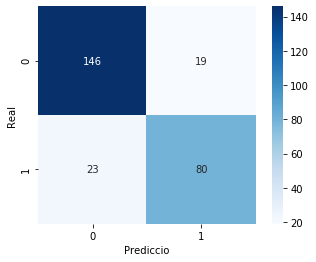

In [48]:
# Matriu de confusió

modelRL = LogisticRegression(C=10, penalty='l2', solver='liblinear').fit(X_train, y_train)
prediccio ['RegLog'] = modelRL.predict(X_test)

avaluacio = {'RegLog':(prediccio['RegLog']==prediccio['Real']).mean()}

matrix = confusion_matrix(y_test, prediccio['RegLog'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

### Arbres de decisió

In [49]:
# Optimització dels paràmetres

parameters = {'criterion':['gini','entropy'], 'splitter':['best','random']}
modelDTree = DecisionTreeClassifier()
search = GridSearchCV(modelDTree, parameters, cv=4, return_train_score=False)
search.fit(X_train, y_train)
resultat = pd.DataFrame(search.cv_results_)
resultat.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016158,0.018058,0.002147,0.000390,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.775641,0.762821,0.782051,0.754839,0.768860,0.010636,1
1,0.004465,0.000419,0.001696,0.000072,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.775641,0.762821,0.750000,0.780645,0.767255,0.011904,2
2,0.004829,0.000723,0.001657,0.000074,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.775641,0.775641,0.743590,0.767742,0.765650,0.013151,3
3,0.004457,0.000305,0.001802,0.000245,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.769231,0.775641,0.750000,0.748387,0.760835,0.011853,4


<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

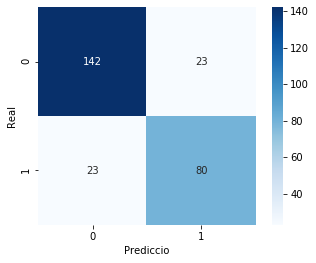

In [50]:
# Matriu de confusió

modelDTree = DecisionTreeClassifier(criterion='gini',splitter='best').fit(X_train, y_train)
prediccio['DTree'] = modelDTree.predict(X_test)

avaluacio['DTree'] = (prediccio['DTree']==prediccio['Real']).mean()

matrix = confusion_matrix(y_test, prediccio['DTree'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

### Random forests

<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

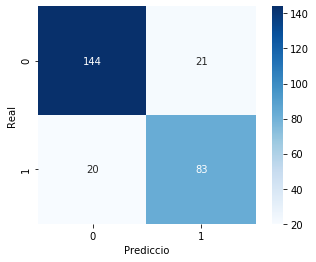

In [52]:
# Matriu de confusió

modelRanFor = RandomForestClassifier(1000).fit(X_train, y_train)
prediccio['RanFor'] = modelRanFor.predict(X_test)

avaluacio['RanFor'] = (prediccio['RanFor']==prediccio['Real']).mean()

matrix = confusion_matrix(y_test, prediccio['RanFor'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

### kNN

In [53]:
# Optimització de paràmetres

parameters = {'n_neighbors':range(3,7)}
modelKNN = KNeighborsClassifier()
search = GridSearchCV(modelKNN, parameters, cv=4, return_train_score=False)
search.fit(X_train, y_train)
resultat = pd.DataFrame(search.cv_results_)
resultat.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,0.004358,0.000387,0.010771,0.000919,4,{'n_neighbors': 4},0.794872,0.826923,0.788462,0.793548,0.800963,0.015194,1
3,0.004123,0.000056,0.032093,0.037237,6,{'n_neighbors': 6},0.788462,0.814103,0.788462,0.806452,0.799358,0.011244,2
2,0.004108,0.000080,0.010657,0.000587,5,{'n_neighbors': 5},0.788462,0.801282,0.788462,0.793548,0.792937,0.005250,3
0,0.024430,0.034497,0.010039,0.000276,3,{'n_neighbors': 3},0.801282,0.801282,0.769231,0.761290,0.783307,0.018222,4


<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

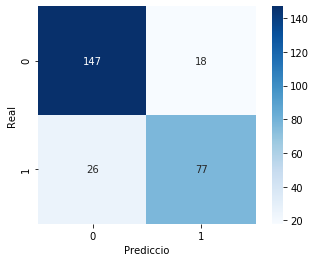

In [54]:
# Matriu de confusió

modelKNN = KNeighborsClassifier(4)
modelKNN.fit(X_train, y_train)

prediccio['KNN'] = modelKNN.predict(X_test)
avaluacio['KNN'] = (prediccio['KNN']==prediccio['Real']).mean()

matrix = confusion_matrix(y_test, prediccio['KNN'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

### Support Vector Machines

In [55]:
# Optimització de paràmetres

parameters = {'C':[1,5,10,20],'kernel':['linear','rbf'], 'gamma':['auto','scale']}
modelSVM = SVC()
search = GridSearchCV(modelSVM, parameters, cv=4, return_train_score=False)
search.fit(X_train, y_train)
resultat = pd.DataFrame(search.cv_results_)
resultat.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.010151,0.001260,0.003581,0.001205,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.801282,0.820513,0.833333,0.864516,0.829856,0.022983,1
1,0.009129,0.000292,0.003008,0.000065,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.801282,0.820513,0.826923,0.864516,0.828250,0.022908,2
7,0.013110,0.000979,0.003534,0.000397,5,scale,rbf,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",0.801282,0.814103,0.833333,0.864516,0.828250,0.023789,2
5,0.010402,0.000353,0.003573,0.001098,5,auto,rbf,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",0.801282,0.814103,0.839744,0.832258,0.821830,0.015102,4
11,0.013427,0.001667,0.003397,0.000584,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.801282,0.814103,0.839744,0.832258,0.821830,0.015102,4
9,0.012344,0.001099,0.003760,0.000940,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.788462,0.814103,0.833333,0.825806,0.815409,0.017018,6
15,0.014964,0.002375,0.002900,0.000391,20,scale,rbf,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}",0.782051,0.814103,0.833333,0.825806,0.813804,0.019592,7
13,0.014277,0.001595,0.002985,0.000328,20,auto,rbf,"{'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}",0.762821,0.833333,0.820513,0.812903,0.807384,0.026770,8
0,0.018987,0.015508,0.002706,0.000401,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.801282,0.807692,0.807692,0.767742,0.796148,0.016556,9
2,0.009800,0.001248,0.002462,0.000162,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.801282,0.807692,0.807692,0.767742,0.796148,0.016556,9


<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

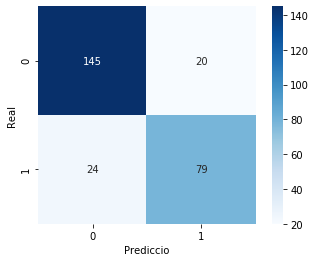

In [56]:
# Matriu de confusió

modelSVM = SVC(C=1, kernel='rbf', gamma='scale').fit(X_train, y_train)
prediccio['SVM'] = modelSVM.predict(X_test)

avaluacio['SVM'] = (prediccio['SVM']==prediccio['Real']).mean()

matrix = confusion_matrix(y_test, prediccio['SVM'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

### Més votat

<module 'matplotlib.pyplot' from '/Users/victor/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

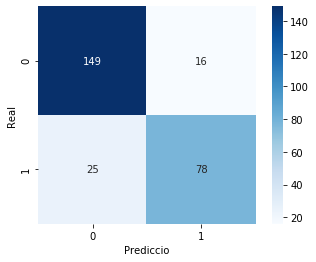

In [57]:
# Matriu de confusió

prediccio['Tots'] = prediccio['RegLog']+prediccio['DTree']+prediccio['RanFor']+prediccio['KNN']+prediccio['SVM']
prediccio.loc[prediccio.Tots<3,'Tots']=0
prediccio.loc[prediccio.Tots>2,'Tots']=1

avaluacio['Tots'] = (prediccio['Tots']==prediccio['Real']).mean()

matrix = confusion_matrix(y_test, prediccio['Tots'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel('Prediccio')
plt.ylabel('Real')
plt

In [58]:
# Avaluació de la precisió dels models
avaluacio

{'RegLog': 0.8432835820895522,
 'DTree': 0.8283582089552238,
 'RanFor': 0.8470149253731343,
 'KNN': 0.835820895522388,
 'SVM': 0.835820895522388,
 'Tots': 0.8470149253731343}

## Resultat

In [59]:
# Resultat
resultat = pd.DataFrame({'PassengerId':test_id})

# Regressió logística
modelRL = LogisticRegression().fit(X,y)
resultat['RegLog'] = modelRL.predict(test)

# Arbres de decisió
modelDTree = DecisionTreeClassifier().fit(X,y)
resultat['DTree'] = modelDTree.predict(test)

# Random forests
modelRanFor = RandomForestClassifier(1000).fit(X,y)
resultat['RanFor'] = modelRanFor.predict(test)

# KNN
modelKNN = KNeighborsClassifier(3).fit(X,y)
resultat['KNN'] = modelKNN.predict(test)

# SVM
modelSVM = SVC(probability=True).fit(X,y)
resultat['SVM'] = modelSVM.predict(test)

# Tots
resultat['Tots'] = resultat['RegLog']+resultat['DTree']+resultat['RanFor']+resultat['KNN']+resultat['SVM']
resultat.loc[resultat.Tots<3,'Tots']=0
resultat.loc[resultat.Tots>2,'Tots']=1


# Guardem els resultats del models amb millor precisió
resultat['Survived'] = resultat['RanFor']
resultat[['PassengerId','Survived']].to_csv('resultat.csv', index = False)

/Users/victor/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/victor/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
